# Music type recognition

In this notebook, we will use the [Music Beat](https://www.kaggle.com/insiyeah/musicfeatures) data set to experiment with the Support Vector Machine classification algorithm.

In [ ]:
# boilerplate imports

# data exploration
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Important**

There are 2 datasets:
- The first is for binary classification
- The second is for multiclass classification (10 classes).

# Binary classification

In [ ]:
binary_df = pd.read_csv("musicfeatures/data_2genre.csv", index_col="filename")
print(binary_df.shape)
binary_df.head()

In [ ]:
# binary_df.dtypes

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(12,4))
sns.distplot(binary_df["label"], kde=False, ax=ax[0])
sns.distplot(binary_df["tempo"], ax=ax[1])
sns.distplot(binary_df["mfcc1"], ax=ax[2])
plt.tight_layout()

Notes:
- Dataset is balanced
- Data will probably need to be normalized

In [ ]:
# Let's 
## - define X and y
## - split the dataset between train and test

X = binary_df.drop(["label"], axis="columns")
y = binary_df["label"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=binary_df["label"])

In [ ]:
# Let's now instantiate an SVM model and fit it

from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel="linear", random_state=1)
classifier.fit(X_train, y_train)

In [ ]:
# perfs
train_preds = classifier.predict(X_train)
train_acc = accuracy_score(train_preds, y_train)
print("Train accuracy", train_acc)

valid_preds = classifier.predict(X_valid)
valid_acc = accuracy_score(valid_preds, y_valid)
print("Valid accuracy", valid_acc)

# Multiclass

In [ ]:
df = pd.read_csv("musicfeatures/data.csv", index_col="filename")
# print(raw_df.dtypes)
df.head(3)

Let's notice that the labels, this time, are **strings**.

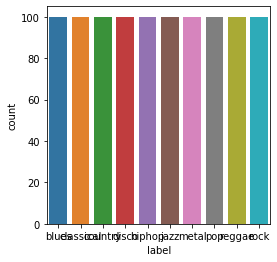

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(df["label"]);

In [14]:
X = df.drop(["label"], axis="columns")
y = df["label"]

# Normalize numerical inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [28]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

# perfs

train_preds = clf.predict(X_train)
train_acc = accuracy_score(train_preds, y_train)
print("Accuracy on training set:", train_acc)

valid_preds = clf.predict(X_valid)
valid_acc = accuracy_score(valid_preds, y_valid)
print("Accuracy on validation set:", valid_acc)

Accuracy on training set: 0.7857142857142857
Accuracy on validation set: 0.63
